# How to plot data

The SciDataTool python module has been created to **ease the handling of scientific data**, and considerately simplify plot commands. It unifies the extraction of relevant data (e.g. slices), whether they are stored in the time/space or in the frequency domain. The call to Fourier Transform functions is **transparent**, although it still can be parameterized through the use of a dictionary.

This tutorial explains how to **plot** fields along specific axes, using the same syntax as the `get_along` methods as seen in the [slice tutorial](https://nbviewer.jupyter.org/github/Eomys/SciDataTool/blob/master/Tutorials/tuto2_Slices.ipynb).

The `DataTime`, `DataFreq` and `VectorField` classes have built-in plot methods: `plot_2D_Data` and `plot_3D_Data`. They allow to automatically format the plots (colors, labels, legends, etc), using the meta data contained in SciDataTool objects.

Here is a first simple example of plot:

<IPython.core.display.Javascript object>


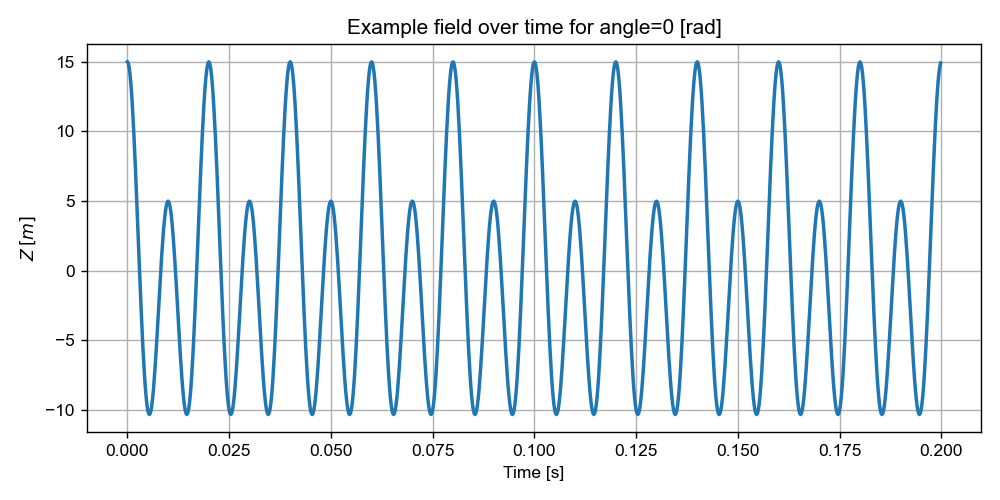

<IPython.core.display.Javascript object>


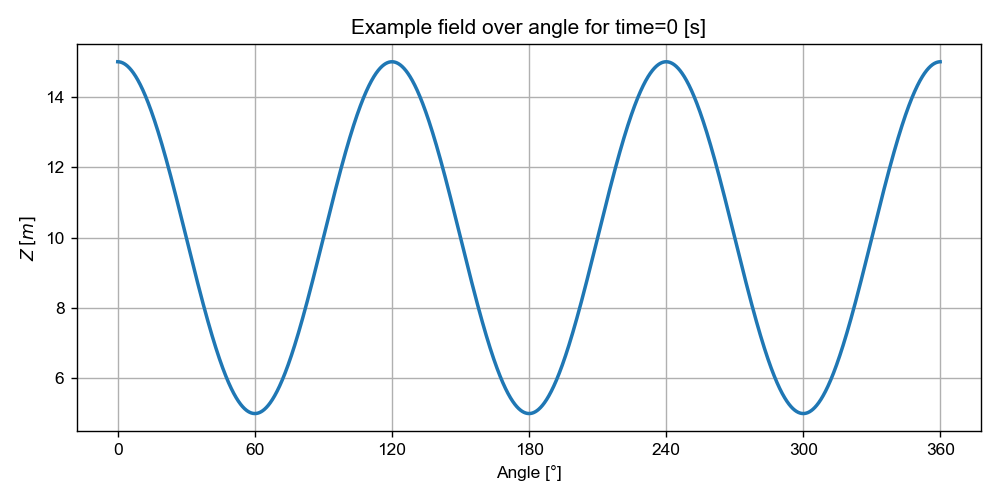

In [1]:
# import SciDataTool objects
from SciDataTool import Data1D, DataLinspace, DataPattern, DataTime, DataFreq, VectorField

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.art3d as art3d
%matplotlib notebook

# Create data
Time = DataLinspace(
    name="time",
    unit="s",
    initial=0,
    final=1/50,
    number=100,
    include_endpoint=False,
    symmetries={"period": 10},
    normalizations={"elec_order": 50},
)
Angle = DataLinspace(
    name="angle",
    unit="rad",
    initial=0,
    final=2 * np.pi,
    include_endpoint=False,
    number=3000
)
Angle_periodic = Angle.get_axis_periodic(3)
angle, time = np.meshgrid(Angle_periodic.get_values(is_smallestperiod=True), Time.get_values(is_smallestperiod=True))
field = 5 * np.cos(2 * np.pi * 50 * time + 3 * angle) + 10 * np.cos(2 * np.pi * 100 * time)
Field = DataTime(name="Example field", symbol="Z", unit="m", axes=[Time, Angle_periodic], values=field)

#---------------------------------------------------------------
# Plot the field along time
Field.plot_2D_Data("time")
# Plot the field along angle
Field.plot_2D_Data("angle{°}")
#---------------------------------------------------------------

## 1. How to plot only one period/antiperiod
To plot only one period or anti-period:

<IPython.core.display.Javascript object>


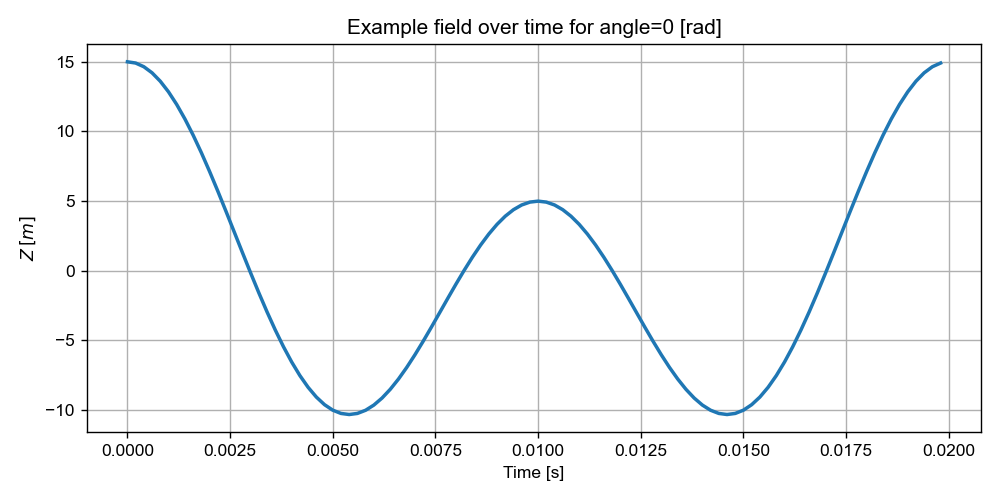

<IPython.core.display.Javascript object>


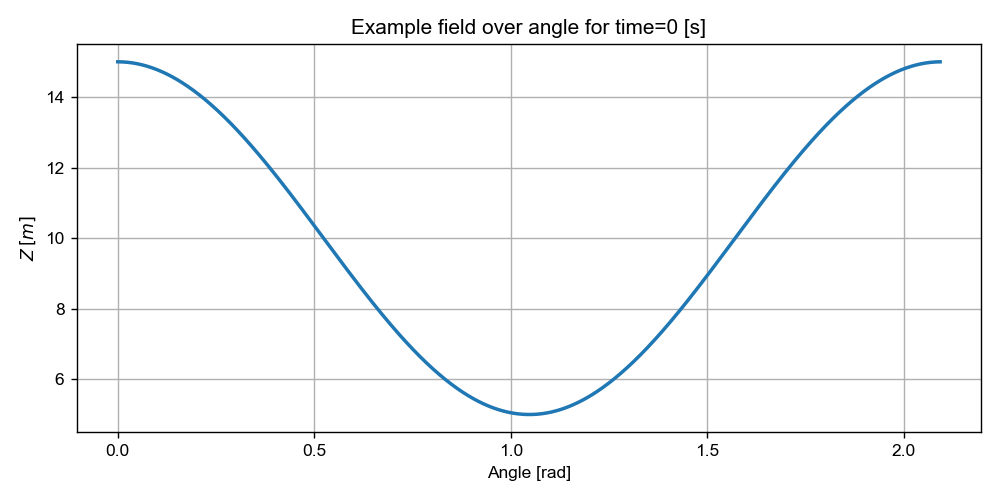

In [2]:
#---------------------------------------------------------------
# Plot the field along the smallest period of time
Field.plot_2D_Data("time[smallestperiod]")
# Plot the field along one period of angle
Field.plot_2D_Data("angle[oneperiod]")
#---------------------------------------------------------------

## 2. How to plot VectorField objects
The same plot command is available for `VectorField` objects: a plot for each component will be created:

<IPython.core.display.Javascript object>


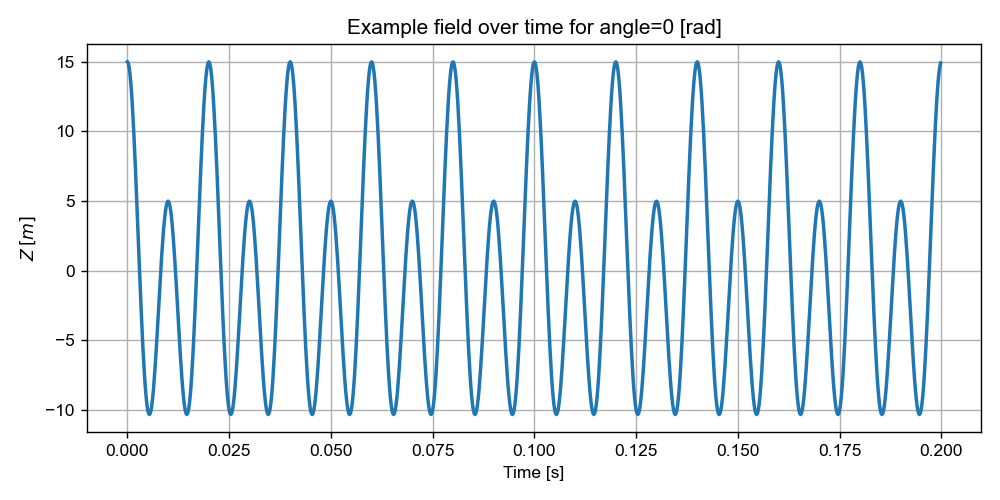

<IPython.core.display.Javascript object>


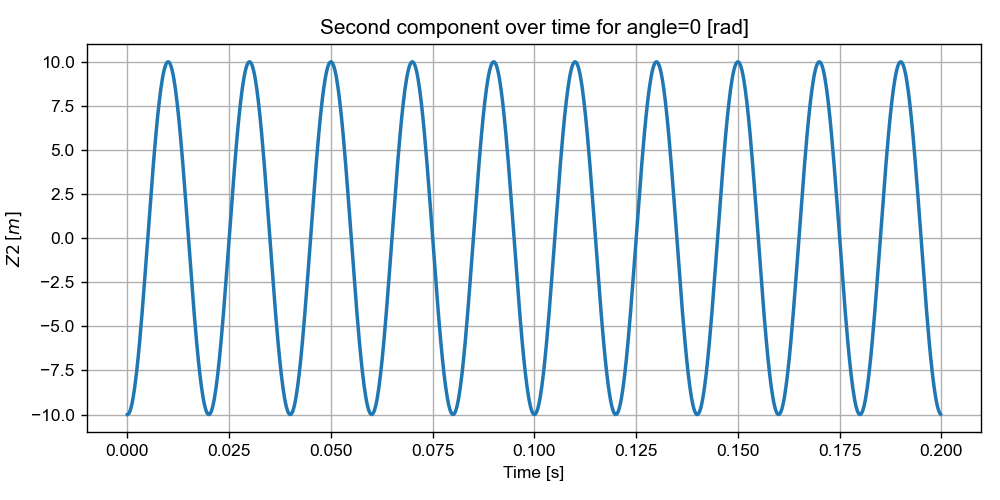

In [3]:
field2 = -10 * np.cos(2 * np.pi * 50 * time + 3 * angle)
Field2 = DataTime(name="Second component", symbol="Z2", unit="m", axes=[Time, Angle_periodic], values=field2)
Vecfield = VectorField(components={"comp_x": Field, "comp_y": Field2})

#---------------------------------------------------------------
# Plot all components
Vecfield.plot_2D_Data("time")
#---------------------------------------------------------------

To plot only one or several specific components, one can use the `component_list` parameter:

<IPython.core.display.Javascript object>


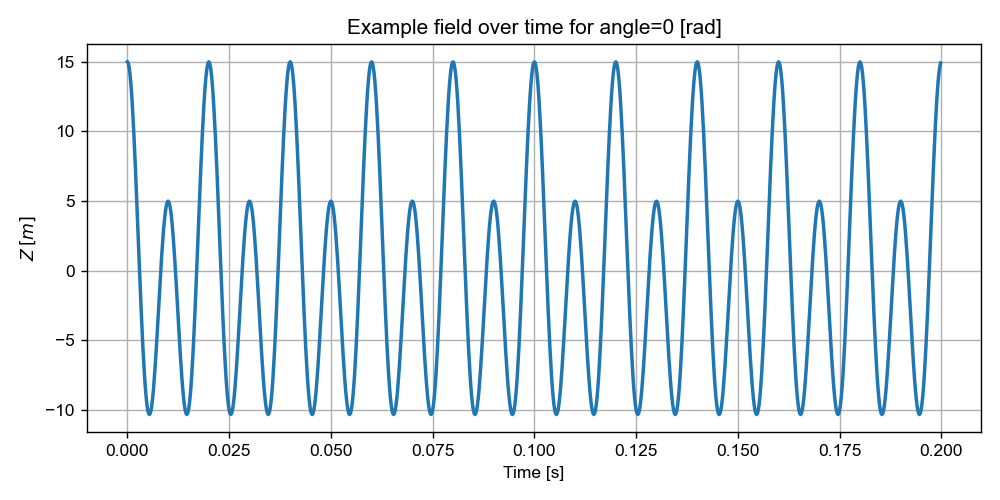

In [4]:
#---------------------------------------------------------------
# Plot only x component components
Vecfield.plot_2D_Data("time", component_list=["comp_x"])
#---------------------------------------------------------------

## 3. How to plot slices

In the previous plots, the fields were sliced at `angle=0` or `time=0` (slice by default), but we could want to slice at another angle:

<IPython.core.display.Javascript object>


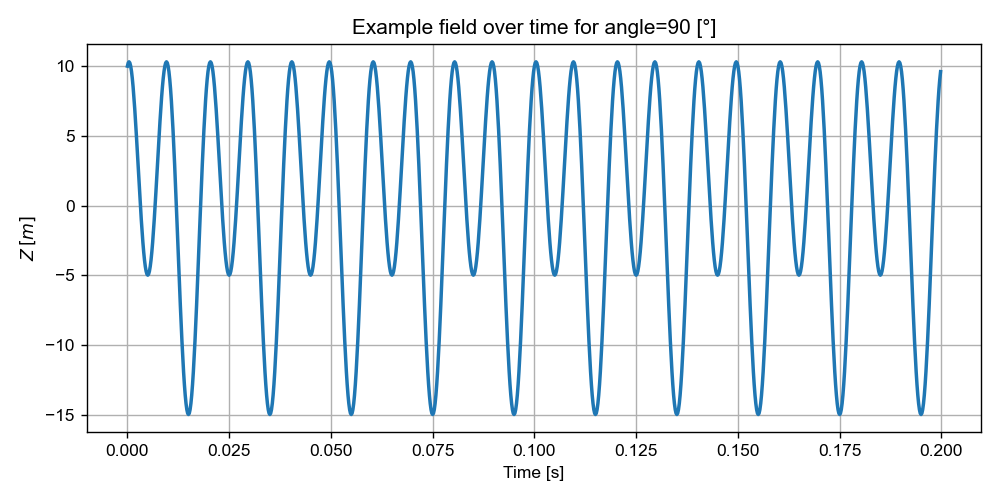

In [5]:
#---------------------------------------------------------------
# Plot for angle = 90°
Field.plot_2D_Data("time", "angle=90{°}")
#---------------------------------------------------------------

We can even superimpose several slices:

<IPython.core.display.Javascript object>


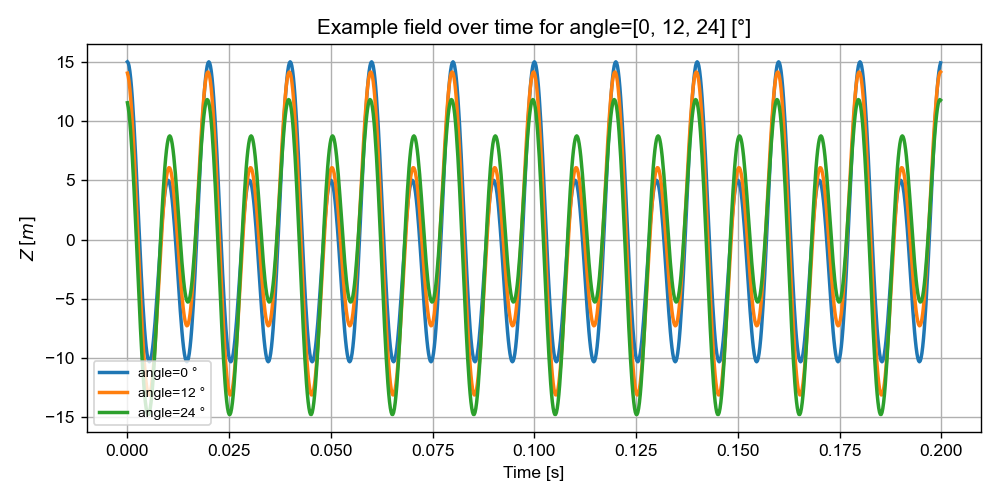

In [6]:
#---------------------------------------------------------------
# Plot field over time for 3 slices of angle
Field.plot_2D_Data("time", "angle[0,100,200]{°}")
#---------------------------------------------------------------

## 4. How to plot spectra

One of the main interest of **SciDataTool** is to hide the complexity of Fourier Transforms. From a field defined in the time/space domain, you can directly plot its spectrum:

<IPython.core.display.Javascript object>


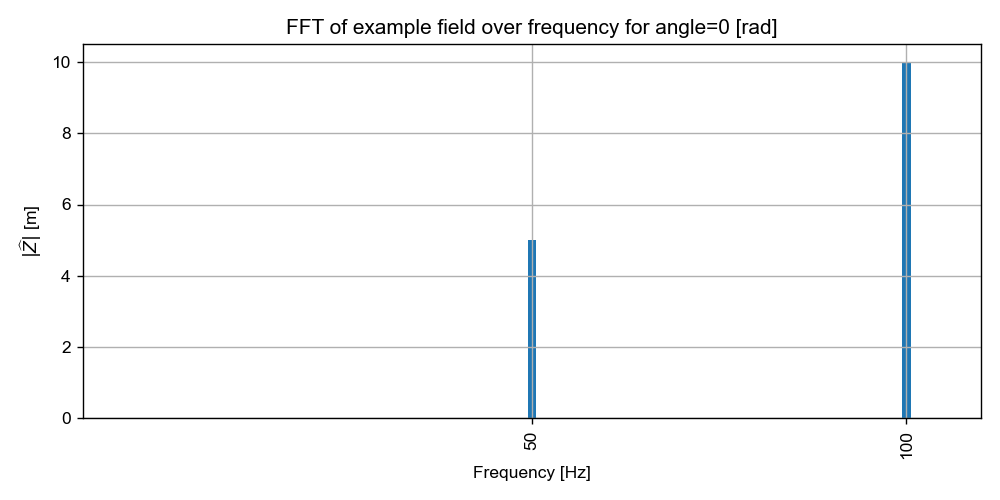

<IPython.core.display.Javascript object>


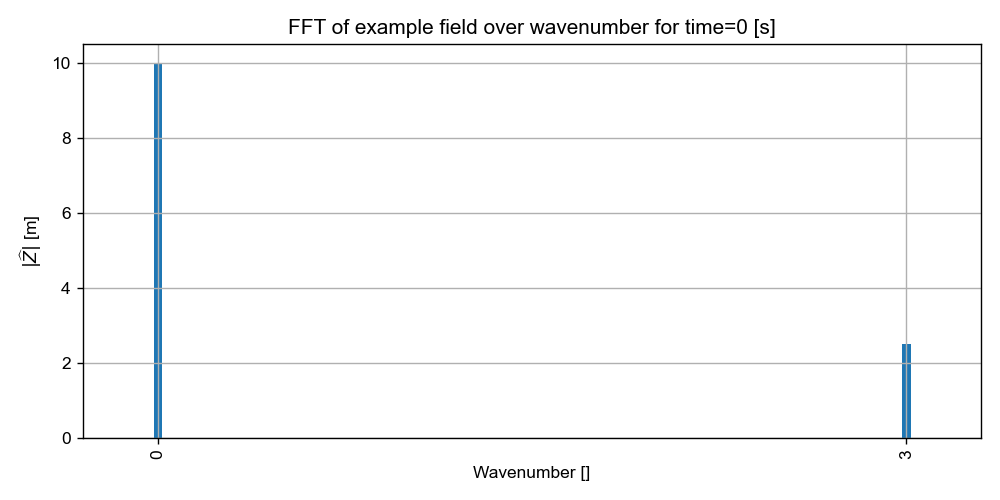

In [7]:
#---------------------------------------------------------------
# Plot time fft
Field.plot_2D_Data("freqs")
# Plot space fft
Field.plot_2D_Data("wavenumber")
#---------------------------------------------------------------

The main frequencies/wavenumbers are automatically labelled. This can be deactivated using `is_auto_ticks=False`:

<IPython.core.display.Javascript object>


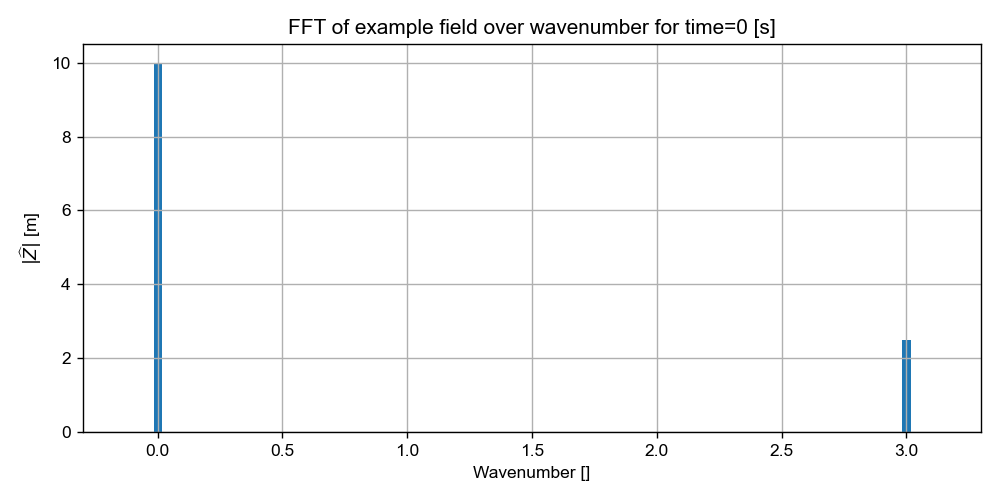

In [8]:
#---------------------------------------------------------------
# Deactivate automatic ticks
Field.plot_2D_Data("wavenumber", is_auto_ticks=False)
#---------------------------------------------------------------

## 5. How to convert or normalize data

Another interesting feature of **SciDataTool** is the conversion feature: **SciDataTool** has built-in methods to convert units, and normalize fields and axes.

For example, we can plot the fft in electrical orders:

<IPython.core.display.Javascript object>


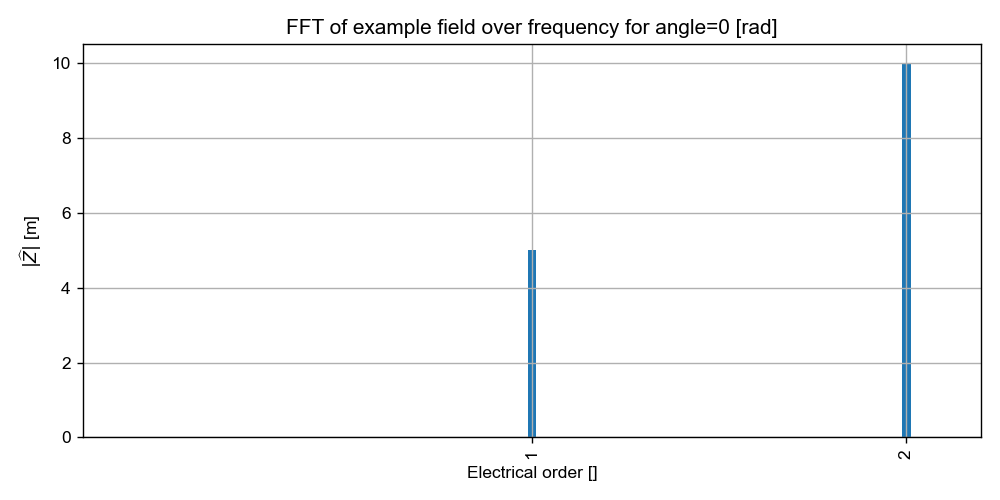

In [9]:
#---------------------------------------------------------------
# Normalize frequency axis
Field.plot_2D_Data("freqs->elec_order")
#---------------------------------------------------------------

In the following example, we will convert the field into mm:

<IPython.core.display.Javascript object>


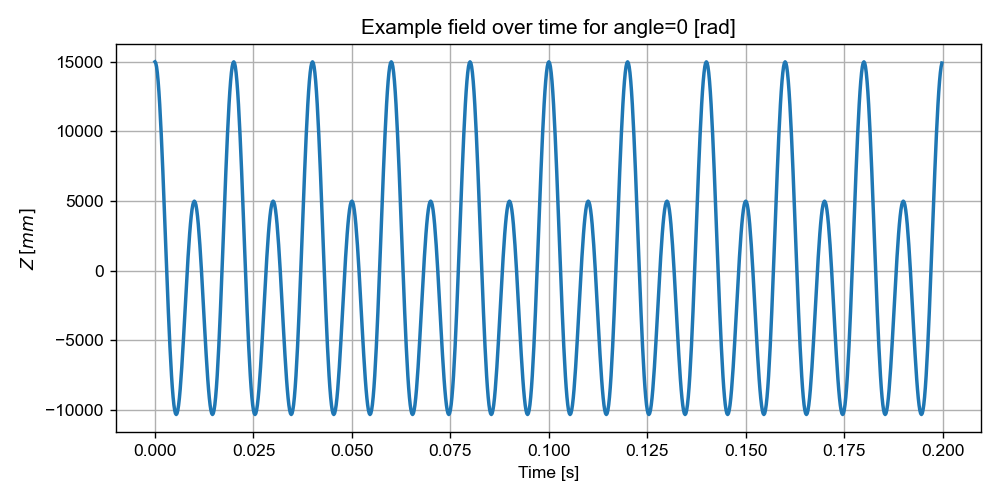

In [10]:
#---------------------------------------------------------------
# Convert field into mm
Field.plot_2D_Data("time", unit="mm")
#---------------------------------------------------------------

In this last example, we will convert the time axis into ms:

<IPython.core.display.Javascript object>


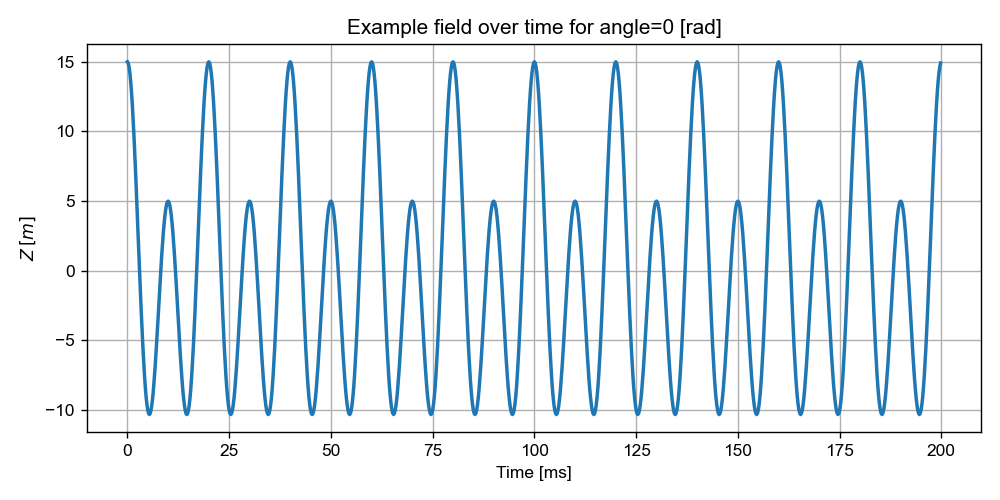

In [11]:
#---------------------------------------------------------------
# Convert time axis into ms
Field.plot_2D_Data("time{ms}")
#---------------------------------------------------------------

## 6. How to compare data

**SciDataTool** also allows to compare several fields, even if they are defined on different discretizations. To do so, the plot commands have a `data_list` parameter:

<IPython.core.display.Javascript object>


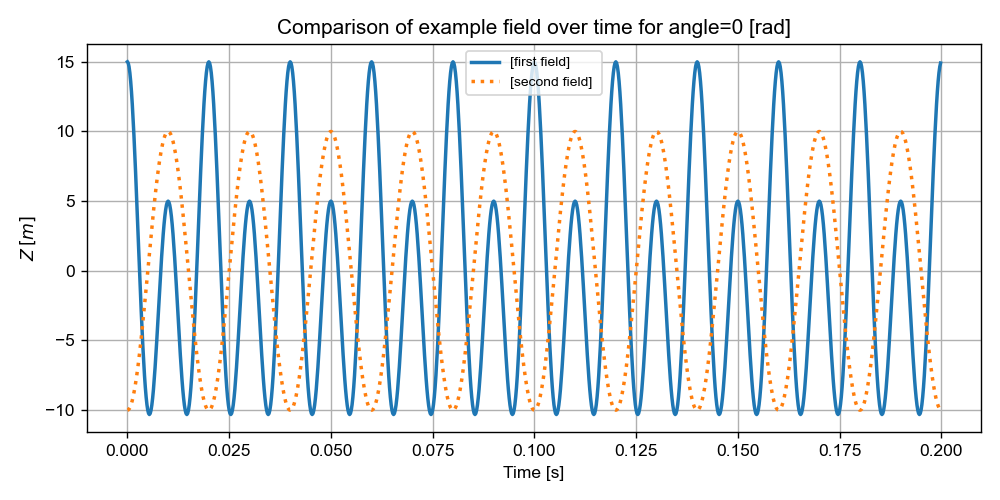

In [12]:
#---------------------------------------------------------------
# Compare Field and Field2
Field.plot_2D_Data("time", data_list=[Field2], legend_list=["first field", "second field"])
#---------------------------------------------------------------

We can also compare fft:

<IPython.core.display.Javascript object>


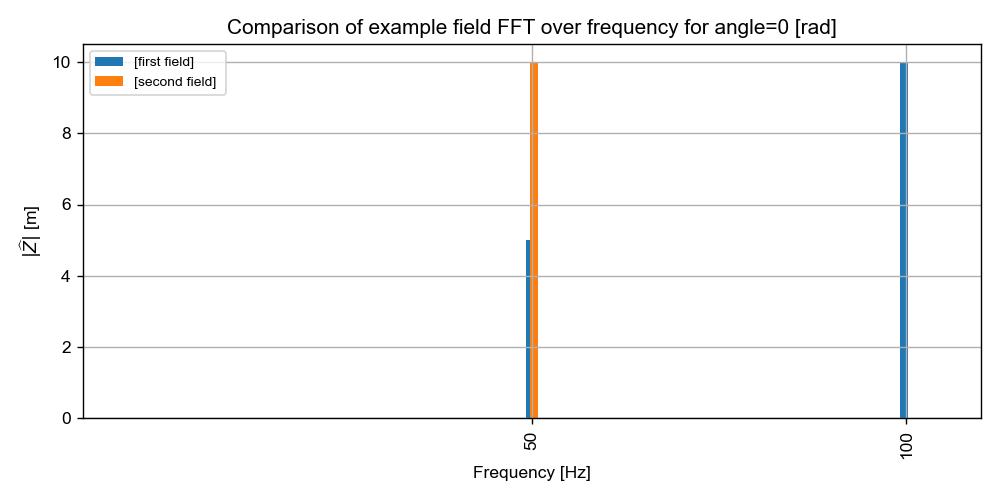

In [13]:
#---------------------------------------------------------------
# Compare Field and Field2
Field.plot_2D_Data("freqs", data_list=[Field2], legend_list=["first field", "second field"])
#---------------------------------------------------------------

## 7. How to plot 3D data

3D plots (for data defined on at least two axes) can also be created using the `plot_3D_Data` command:

<IPython.core.display.Javascript object>


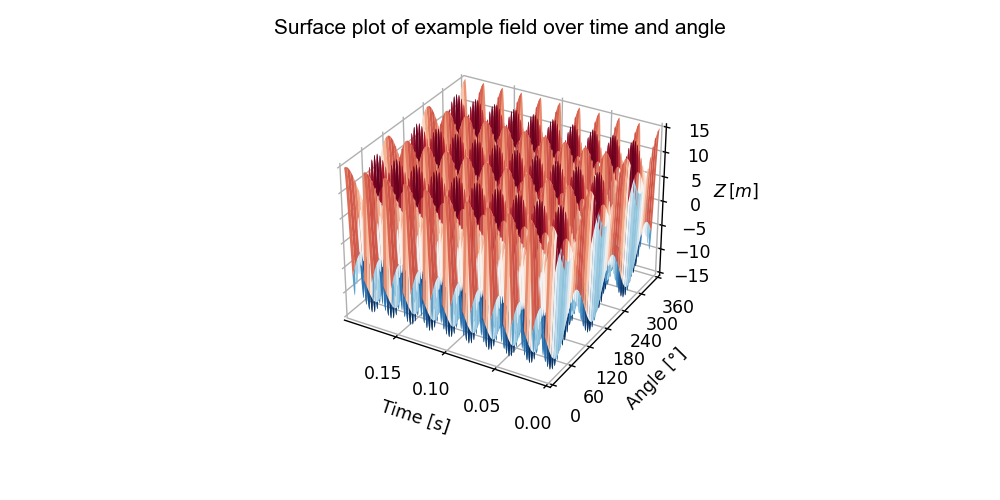

In [14]:
#---------------------------------------------------------------
# Surface plot
Field.plot_3D_Data("time", "angle{°}")
#---------------------------------------------------------------

To visualize this surface from above, use `is_2D_view`:

<IPython.core.display.Javascript object>


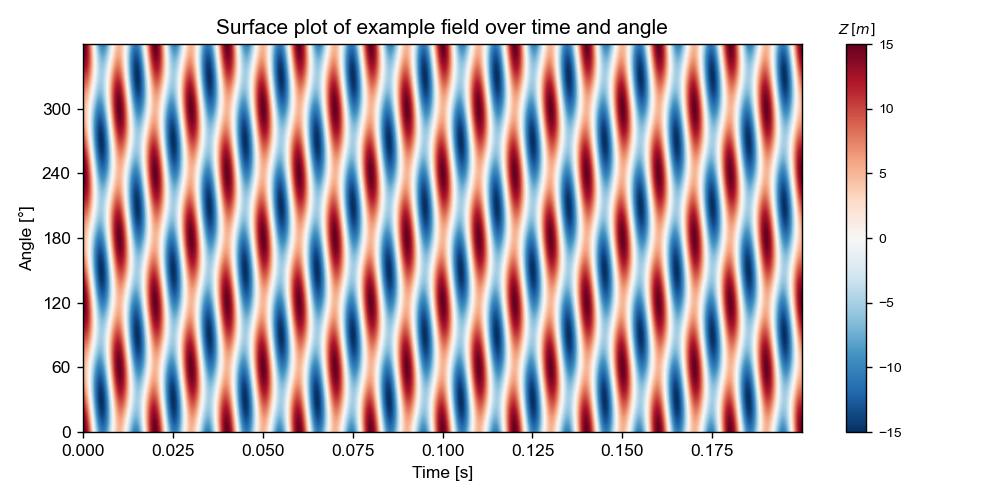

In [15]:
#---------------------------------------------------------------
# Surface plot in 2D
Field.plot_3D_Data("time", "angle{°}", is_2D_view=True)
#---------------------------------------------------------------

The field is automatically reconstructed using the periodicities specified in the simulation. It is always possible to plot a single period:

<IPython.core.display.Javascript object>


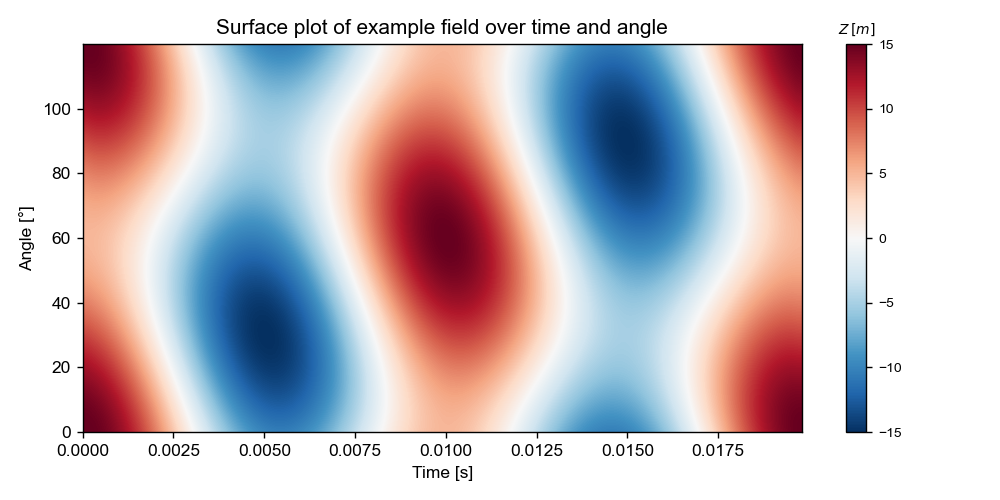

In [16]:
#---------------------------------------------------------------
# 2D surface plot with a single period
Field.plot_3D_Data("time[smallestperiod]", "angle[smallestperiod]{°}", is_2D_view=True)
#---------------------------------------------------------------

2D Fourier Transforms also rely on `plot_3D_Data` command:

<IPython.core.display.Javascript object>


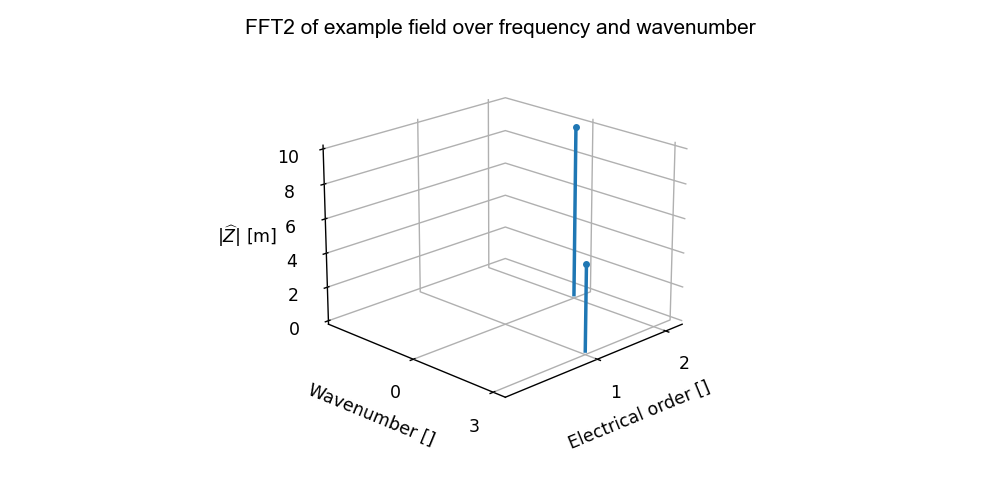

In [18]:
#---------------------------------------------------------------
# 3D FFT2
Field.plot_3D_Data("freqs->elec_order", "wavenumber", N_stem=2)
#---------------------------------------------------------------

It can also be viewed in 2D:

<IPython.core.display.Javascript object>


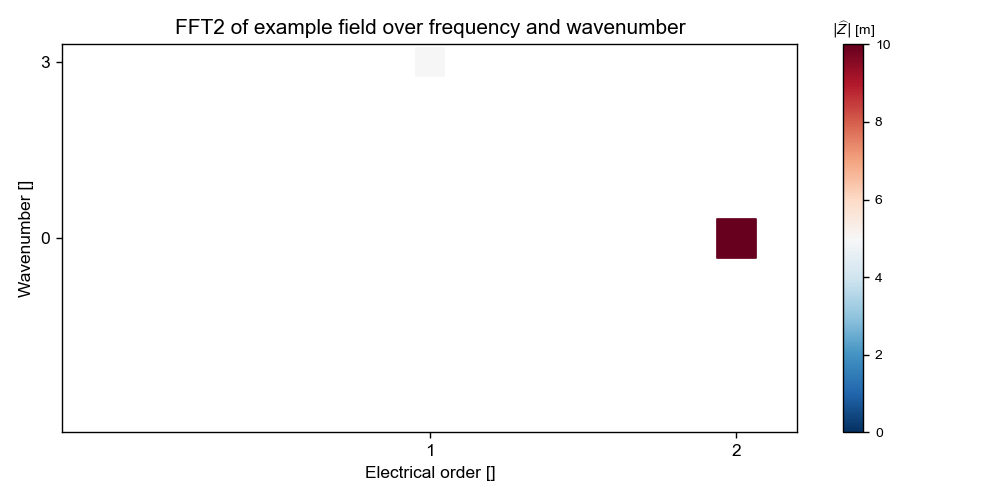

In [20]:
#---------------------------------------------------------------
# 2D FFT2
Field.plot_3D_Data("freqs->elec_order", "wavenumber", is_2D_view=True)
#---------------------------------------------------------------

Note that the squares can have the same size using `is_same_size`:

<IPython.core.display.Javascript object>


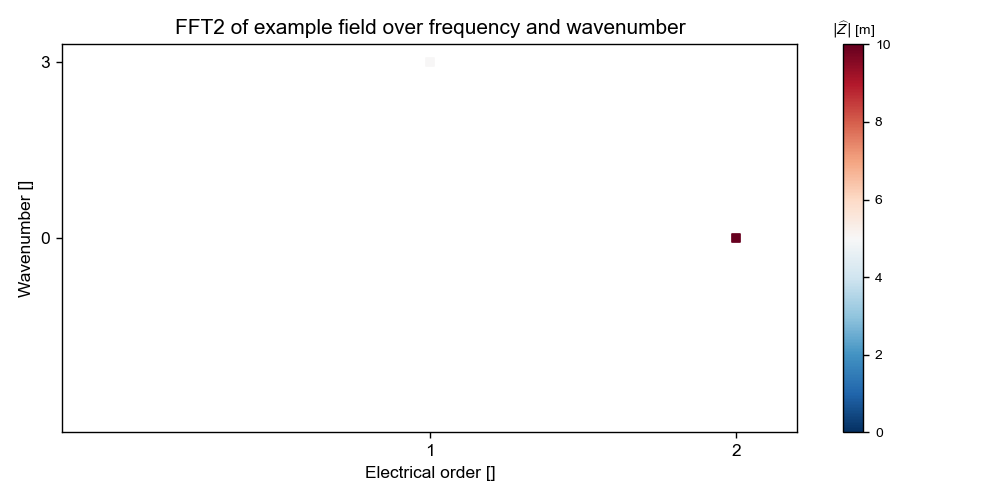

In [21]:
#---------------------------------------------------------------
# 2D FFT2 with same size
Field.plot_3D_Data("freqs->elec_order", "wavenumber", is_2D_view=True, is_same_size=True)
#---------------------------------------------------------------

## 8. How to plot data with a pattern axis
The plot commands are strictly the same with pattern axes. You can see here the difference between `is_step=True` and `is_step=False`:

<IPython.core.display.Javascript object>


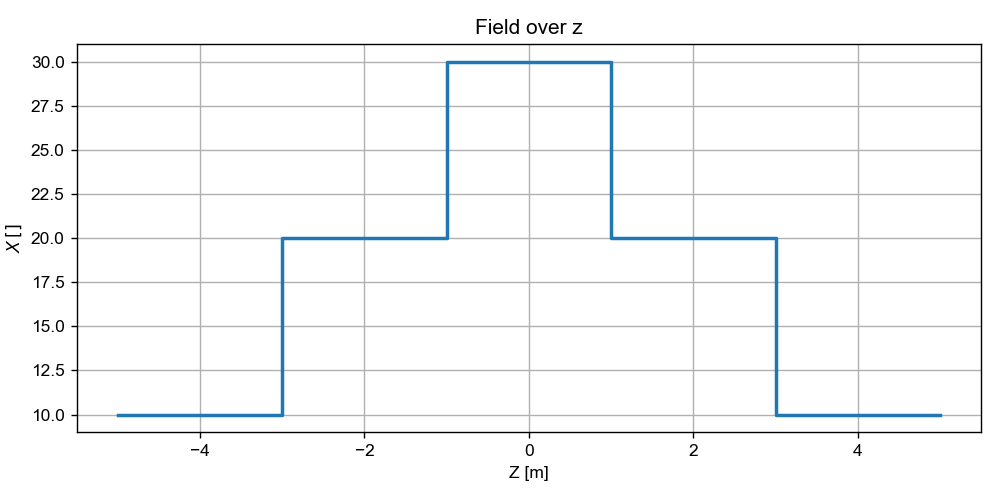

<IPython.core.display.Javascript object>


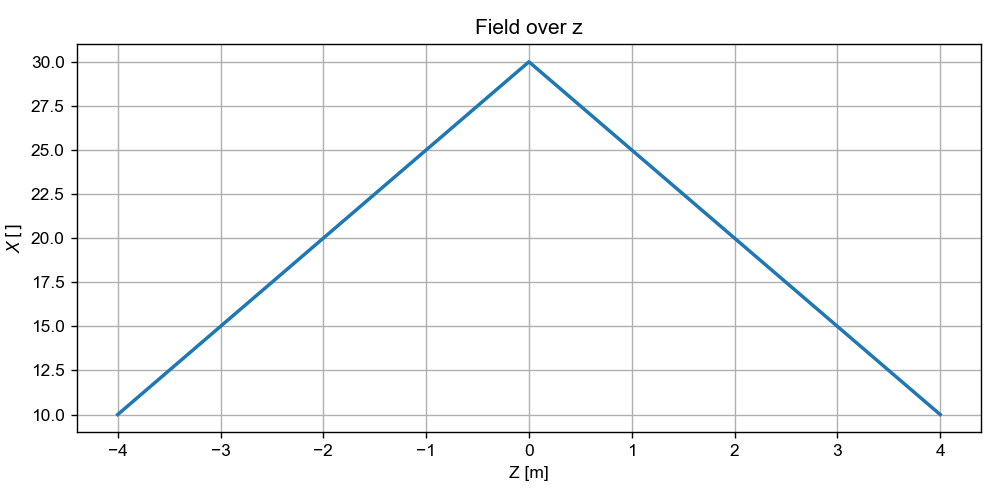

In [34]:
Slices = DataPattern(
    name="z",
    unit="m",
    values=np.array([-1, -3, -5]),
    values_whole=np.array([-5, -3, -3, -1, -1, 1, 1, 3, 3, 5]),
    unique_indices=[4, 2, 0],
    rebuild_indices=[2, 2, 1, 1, 0, 0, 1, 1, 2, 2],
    is_step=True,
)
field = np.array([30, 20, 10])
Field = DataTime(
    name="field",
    symbol="X",
    axes=[Slices],
    values=field,
)

#---------------------------------------------------------------
# Plot with step axis
Field.plot_2D_Data("z")
#---------------------------------------------------------------

Slices = DataPattern(
    name="z",
    unit="m",
    values=np.array([0, -2, -4]),
    values_whole=np.array([-4, -2, 0, 2, 4]),
    unique_indices=[2, 1, 0],
    rebuild_indices=[2, 1, 0, 1, 2],
    is_step=False,
)
field = np.array([30, 20, 10])
Field = DataTime(
    name="field",
    symbol="X",
    axes=[Slices],
    values=field,
)

#---------------------------------------------------------------
# Plot with step axis
Field.plot_2D_Data("z")
#---------------------------------------------------------------